                city  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
week_start_date                                                        
2000-07-01        iq  2000          26  0.192886  0.132257  0.340886   
2000-07-08        iq  2000          27  0.216833  0.276100  0.289457   
2000-07-15        iq  2000          28  0.176757  0.173129  0.204114   
2000-07-22        iq  2000          29  0.227729  0.145429  0.254200   
2000-07-29        iq  2000          30  0.328643  0.322129  0.254371   

                  ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
week_start_date                                                          
2000-07-01       0.247200                 25.41             296.740000   
2000-07-08       0.241657                 60.61             296.634286   
2000-07-15       0.128014                 55.52             296.415714   
2000-07-22       0.200314                  5.60             295.357143   
2000-07-29       0.361043                 62.76    

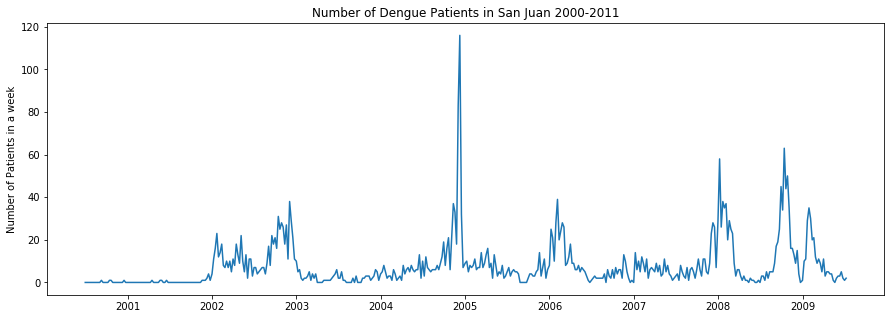

In [7]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer as im

%matplotlib inline

data = pd.read_csv("iq_train.csv", index_col=3, parse_dates=['week_start_date'])
data_predict=pd.read_csv("iq_test.csv", index_col=3, parse_dates=['week_start_date'])

#drop non-numerical values
print(data.head())
#print(data_predict.head())

#plotting san juan
plt.figure(figsize=(15,5));
plt.plot(data.index,data['total_cases']);
plt.ylabel('Number of Patients in a week');
plt.title('Number of Dengue Patients in San Juan 2000-2011');
plt.plot();

In [4]:
model = pf.ARIMAX(data=data, formula='total_cases~1+ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw+reanalysis_air_temp_k\
        +reanalysis_relative_humidity_percent+reanalysis_specific_humidity_g_per_kg+reanalysis_tdtr_k\
        +station_avg_temp_c+station_diur_temp_rng_c+station_max_temp_c+station_min_temp_c+station_precip_mm ',
                  ar=2, ma=1,integ=0, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(2,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: total_cases                         Method: MLE                                       
Start Date: 2000-07-15 00:00:00                         Log Likelihood: -1595.4601                        
End Date: 2009-07-09 00:00:00                           AIC: 3226.9202                                    
Number of observations: 468                             BIC: 3301.5926                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.0801     0.1744     0.4595   0.6459   (-0.2616 | 0.4219)       
AR(2)                                

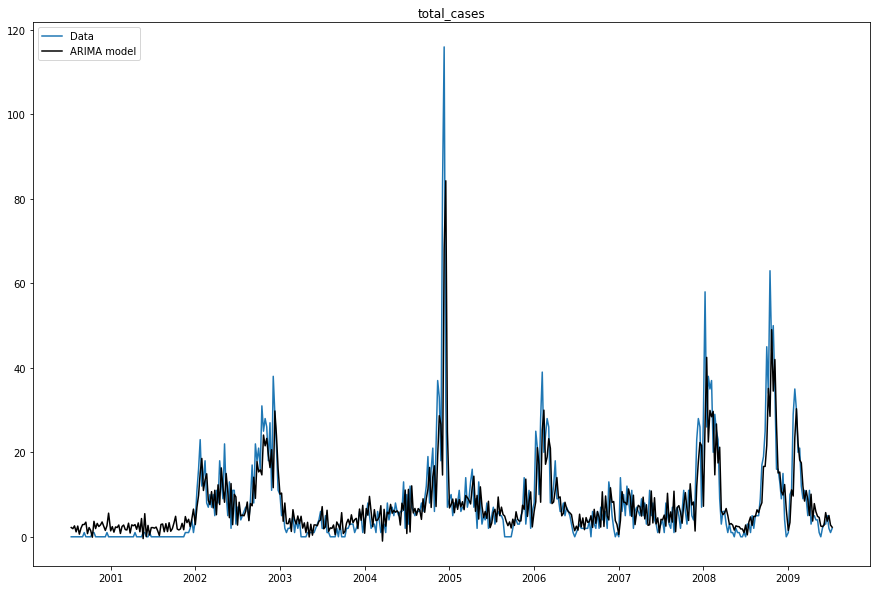

In [5]:
model.plot_fit(figsize=(15,10))

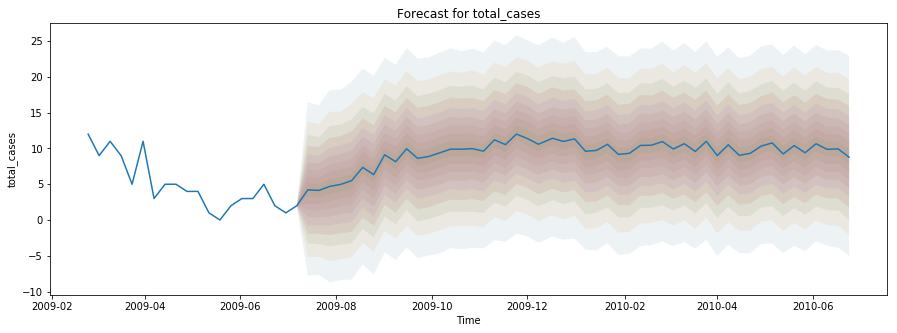

In [6]:
predictions=model.predict(h=50, oos_data=data_predict.iloc[0:] )
predictions.to_csv('predicting_Iquitos.csv', sep=',', encoding='utf-8')
model.plot_predict(h=50, oos_data=data_predict.iloc[0:], figsize=(15,5))